/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: The following kwargs were not used by contour: 'spacing'
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


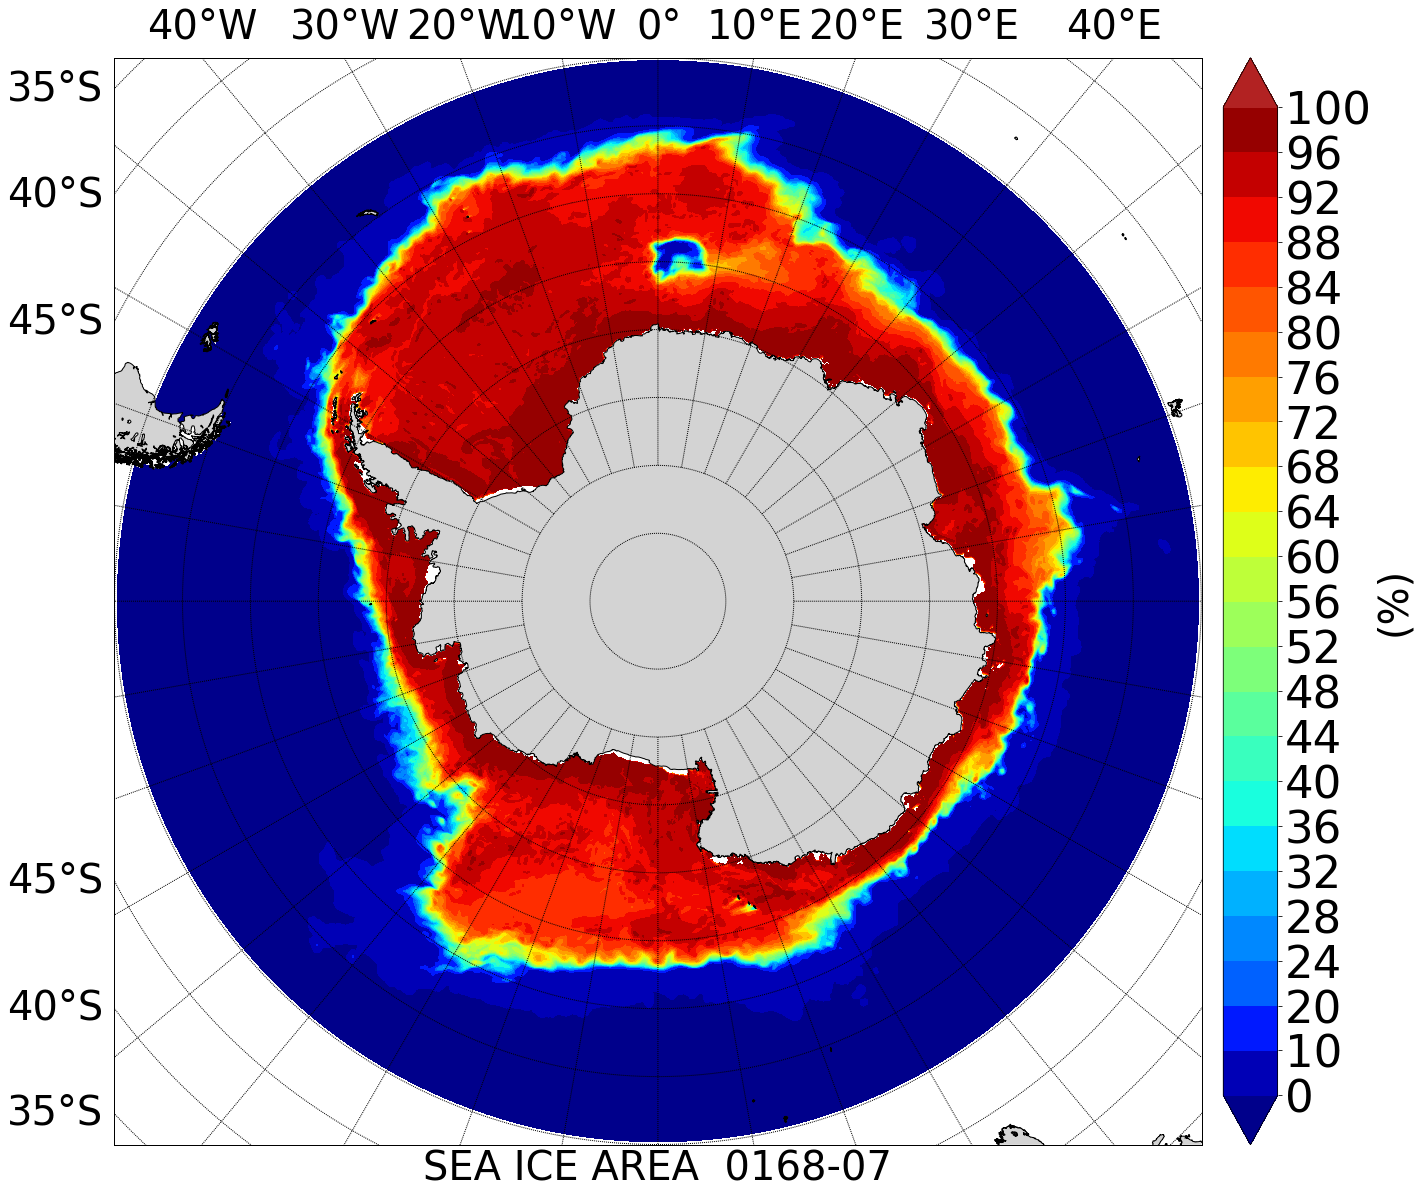

In [1]:
# first plot

import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

months = [f"{x:02d}" for x in range(7,8)]
years = [f"{x:04d}" for x in range(168,169)]
i =0
for yy in years:
    for mm in months:
        #data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ice500/cmpr_B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.'+yy+'-'+mm +'.aice.nc')
        data=nc.Dataset('/scratch/group/ihesp/user/xiliangdiao/ihespdata/ice300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.'+yy+'-'+mm +'.aice.nc')
        plotvar = data.variables['aice'][0,:,:]
        lont = data.variables['lont_bounds'][:,:,0]
        latt = data.variables['latt_bounds'][:,:,0]

        # Pick some of the nicer colors from the palette...
        nice_cmap=plt.get_cmap('jet')
        lev_cmap = nice_cmap([10,20,30,40,50,60,70,80,90,100,110,120,140,150,160,170,180,190,200,210,220,230,240,290,300])
        #new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
        new_cmap = cols.ListedColormap(lev_cmap,"jet")
        nice_levels = [0,10,20,24,28,32,36,40,44,48,52,56,60,64,68,72,76,80,84,88,92,96,100]
        #nice_levels = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5]
        #colorlevel = [0,20,40,60,80,100]
        norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************
#********************************************************************
        plt.figure(figsize=(25,20))
        my_font = {'fontname':'Cambria', 'size':'40'}

        map = Basemap(projection='aeqd', lat_0 = -90, lon_0 = 0,area_thresh = 100,\
                     width = 8900000,height = 8900000,resolution ='h') 
        map.drawcoastlines()
        map.fillcontinents(color = 'lightgrey')
        map.drawmapboundary(color='black')
 
        map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
        map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)
        x,y=map(lont,latt)
        CP = map.contourf(x,y,plotvar,range(0,100),cmap = nice_cmap,spacing = 'uniform',\
                  levels = nice_levels,extend='both')
        CP.cmap.set_over('firebrick')
        CP.cmap.set_under('darkblue')
#cmap = new_cmap,norm =norm,
        #CP = map.contourf(x,y,plotvar,vmin = 0.000000001, vmax = 100, cmap=new_cmap)
        #cbar =map.colorbar(CP,extend='both',extendfrac='auto',extendrect='True')
        cbar =map.colorbar(CP,ticks=nice_levels)
        cbar.set_label('(%)', **my_font)
        cbar.ax.tick_params(labelsize=45)
        i= i+1
        #plt.suptitle('SEA ICE Thickness  '+yy+'-'+mm,**my_font)
        plt.xlabel('SEA ICE AREA  '+yy+'-'+mm,**my_font)
# it is important to save the images in a very sequential manner or ffmpeg will not work !!!
        #plt.savefig('aice'+y +'-' + m+ '.png')
        plt.savefig("/scratch/user/xiliangdiao/plot-PI/PSP_%04d.png"%(i))